<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/KDD_cup_2009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-7-d9cc61d6a283>:25: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.mean())


ValueError: ignored

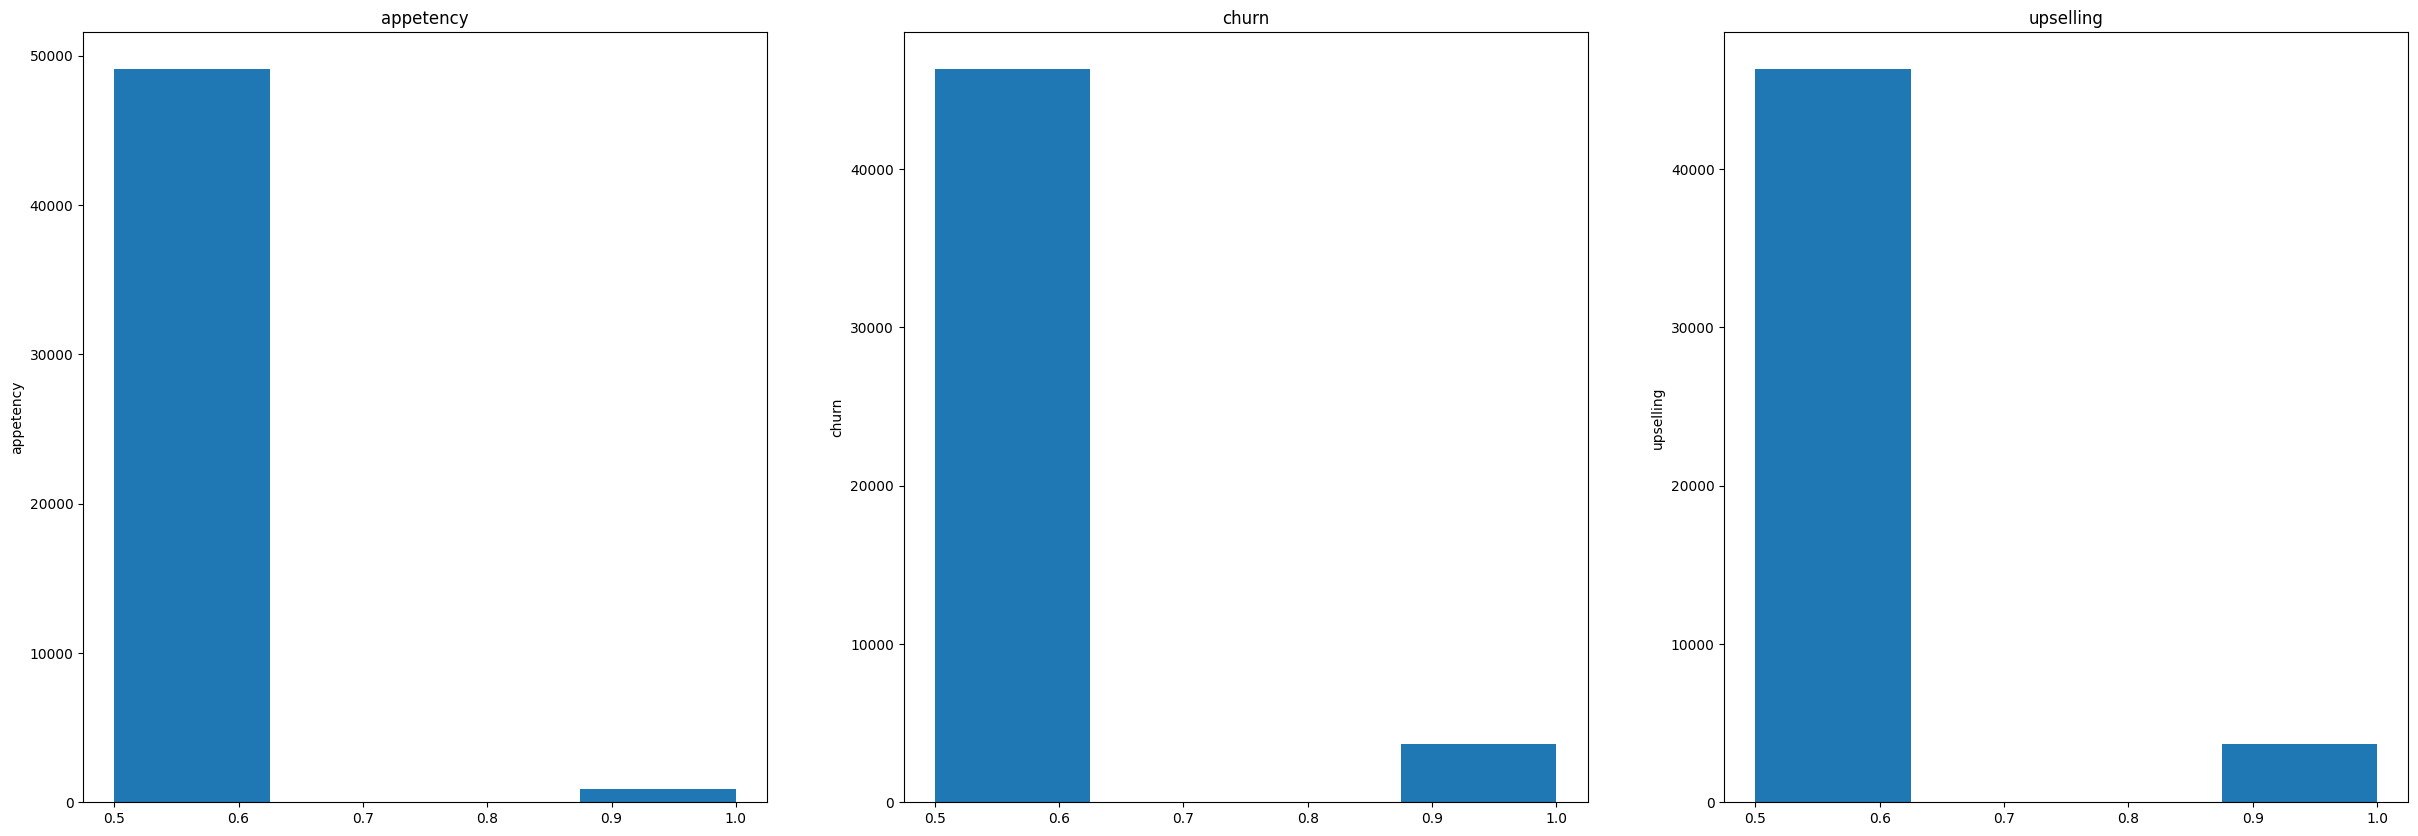

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score
)

# Read data
train = pd.read_table('orange_small_train.data')
test = pd.read_table('orange_small_test.data')
appetency = pd.read_table('orange_small_train_appetency.labels', header=None).loc[:, 0].astype('category')
churn = pd.read_table('orange_small_train_churn.labels', header=None).loc[:, 0].astype('category')
upselling = pd.read_table('orange_small_train_upselling.labels', header=None).loc[:, 0].astype('category')

# Dataset Analysis
train.describe()

# Handling missing values and non-numerical columns
train = train.fillna(train.mean())
droplist = ['Var{}'.format(i) for i in range(train.shape[1] - 40, train.shape[1] + 1)]
train = train.drop(droplist, axis=1).fillna(0)

# Transform labels to 0 or 1
appetency = (appetency.cat.codes + 1) / 2
churn = (churn.cat.codes + 1) / 2
upselling = (upselling.cat.codes + 1) / 2


# Visualization
labels = pd.concat([appetency, churn, upselling], axis=1)
labels.columns = ['appetency', 'churn', 'upselling']
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

for ax, col in zip(axes, labels.columns):
    ax.hist(labels[col], bins=4)
    ax.set_ylabel(col)
    ax.set_title(col)

# Set up random seed for reproducibility
RANDOM_SEED = 42

# Combine data and labels
data = pd.concat([train, labels], axis=1)

# Upsample minority class for the 'appetency' column
datatrain = data.drop(['churn', 'upselling'], axis=1)
df_maj = datatrain[datatrain.appetency == 0]
df_min = datatrain[datatrain.appetency == 1]
df_min_upsampled = resample(df_min, replace=True, n_samples=df_maj.shape[0], random_state=RANDOM_SEED)
df_upsampled = pd.concat([df_maj, df_min_upsampled])

df_X = df_upsampled.drop(['appetency'], axis=1)
df_y = df_upsampled['appetency']


# Upsample minority class for the 'appetency' column
df_min_upsampled = resample(
    df_min,
    replace=True,
    n_samples=max(df_maj.shape[0], int(df_maj.shape[0] * 1.2)),  # Adjust the upsampling ratio
    random_state=RANDOM_SEED
)

# Combine majority and upsampled minority class
df_upsampled = pd.concat([df_maj, df_min_upsampled])

# Ensure there are enough samples for the specified test_size
if df_upsampled.shape[0] < 2:
    raise ValueError("Insufficient data after upsampling. Adjust parameters.")

# If there are enough samples, proceed with the train-test split
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop(['appetency'], axis=1),
                                                    df_upsampled['appetency'],
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

# ...





# Continue with the train-test split
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop(['appetency'], axis=1),
                                                    df_upsampled['appetency'],
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=RANDOM_SEED)

# Standardize the features
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

# Build and train the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32, 16, 8), learning_rate_init=0.01, max_iter=500)
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'], fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(y_test, predictions))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report

# Read data
train = pd.read_table('orange_small_train.data')
appetency = pd.read_table('orange_small_train_appetency.labels', header=None).loc[:, 0].astype('category')

# Dataset Analysis
train.describe()

# Handling missing values and non-numerical columns
train = train.fillna(train.mean())
droplist = ['Var{}'.format(i) for i in range(train.shape[1] - 40, train.shape[1] + 1)]
train = train.drop(droplist, axis=1).fillna(0)

# Transform labels to 0 or 1
appetency = (appetency + 1) / 2

# Combine data and labels
data = pd.concat([train, appetency], axis=1)

# Upsample minority class for the 'appetency' column
df_maj = data[data.appetency == 0]
df_min = data[data.appetency == 1]
df_min_upsampled = resample(df_min, replace=True, n_samples=max(df_maj.shape[0], 1000), random_state=RANDOM_SEED)
df_upsampled = pd.concat([df_maj, df_min_upsampled])

# Ensure there are enough samples for the specified test_size
if df_upsampled.shape[0] < 2:
    raise ValueError("Insufficient data after upsampling. Adjust parameters.")

# Continue with the train-test split
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop(['appetency'], axis=1),
                                                    df_upsampled['appetency'],
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

# Standardize the features
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

# Build and train the AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, random_state=RANDOM_SEED)
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'], fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(y_test, predictions))


<ipython-input-9-aed91c833d35>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.mean())


TypeError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report

# Read data
train = pd.read_table('orange_small_train.data')
appetency = pd.read_table('orange_small_train_appetency.labels', header=None).loc[:, 0].astype('category')

# Dataset Analysis
train.describe()

# Handling missing values and non-numerical columns
train = train.fillna(train.mean())
droplist = ['Var{}'.format(i) for i in range(train.shape[1] - 40, train.shape[1] + 1)]
train = train.drop(droplist, axis=1).fillna(0)

# Transform labels to 0 or 1
appetency = (appetency.cat.codes + 1) / 2

# Combine data and labels
data = pd.concat([train, appetency], axis=1)
# Display the columns in your DataFrame
print(data.columns)

# Replace 'appetency' with the correct column name in your DataFrame
df_maj = data[data['Var1'] == 0]
df_min = data[data['Var1'] == 1]
df_min_upsampled = resample(df_min, replace=True, n_samples=max(df_maj.shape[0], 1000), random_state=RANDOM_SEED)
df_upsampled = pd.concat([df_maj, df_min_upsampled])



# Ensure there are enough samples for the specified test_size
if df_upsampled.shape[0] < 2:
    raise ValueError("Insufficient data after upsampling. Adjust parameters.")

# Continue with the train-test split
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop(['appetency'], axis=1),
                                                    df_upsampled['appetency'],
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

# Standardize the features
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

# Build and train the AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, random_state=RANDOM_SEED)
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'], fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(y_test, predictions))


<ipython-input-15-02f3455a77fc>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.mean())


Index([  'Var1',   'Var2',   'Var3',   'Var4',   'Var5',   'Var6',   'Var7',
         'Var8',   'Var9',  'Var10',
       ...
       'Var181', 'Var182', 'Var183', 'Var184', 'Var185', 'Var186', 'Var187',
       'Var188', 'Var189',        0],
      dtype='object', length=190)


ValueError: ignored

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

''' Desafio KDD 2009 '''

# Imports
import argparse
import numpy as np
import pandas as pd

# Classifiers
from xgboost import XGBClassifier

# Metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#
def arg_passing():
	''' Argument Parsing '''
	parser = argparse.ArgumentParser(description='KDD 2009 Challenge')

	# Main arguments
	parser.add_argument('-d', nargs=1, type=str, default=["data/orange_small_train.data"], help='Data file')
	parser.add_argument('-l', nargs=1, type=str, required=True, help='Labels file')
	parser.add_argument('-s', nargs=1, type=str, default=["\t"], help='Separator')
	parser.add_argument('-k', nargs=1, type=float, default=[10], help='Number of folds / Test Split Percentange')

	parser.add_argument('-p', nargs=1, type=float, help='Exclude nominal with x null percentange columns')
	parser.add_argument('-e', action='store_true', help='Exclude nominal columns')

	# XGBoost arguments
	parser.add_argument('--max_depth', nargs=1, type=int, default=[3], help='XGBoost.max_depth')
	parser.add_argument('--n_estimators', nargs=1, type=int, default=[100], help='XGBoost.n_estimators')
	parser.add_argument('--subsample', nargs=1, type=float, default=[1], help='XGBoost.subsample')
	parser.add_argument('--gamma', nargs=1, type=float, default=[0], help='XGBoost.gamma')

	#
	return parser.parse_args()

#
if __name__ == '__main__':
	''' Main '''
	args = arg_passing()

	# Parameters
	data = args.d[0]
	labels = args.l[0]
	sep = args.s[0]
	split = args.k[0]

	# Load data
	X_data = pd.read_table(data, sep=sep)
	y_data = pd.read_table(labels, sep=sep, header=None)

	# Data pre-processing
	X_data.fillna(0, inplace=True)

	if args.e:
		X_data = X_data.select_dtypes(exclude=['object'])
		print('Dropped all nominal columns')
	else:
		obj_columns = X_data.select_dtypes(include=['object']).columns
		X_data[obj_columns] = X_data[obj_columns].astype('category').apply(lambda x: x.cat.codes)

		if args.p is not None:
			total = len(X_data)
			drop_cols = []

			for i in obj_columns:
				if len(X_data[X_data[i] == 0]) / total > args.p[0]:
					drop_cols.append(i)

			X_data.drop(drop_cols, axis=1, inplace=True)
			print('Dropped {0} nominal columns. Percentage {1}'.format(len(drop_cols), args.p[0]))

	# Classifier
	classifier = XGBClassifier(
		max_depth=args.max_depth[0],
		n_estimators=args.n_estimators[0],
		subsample=args.subsample[0],
		gamma=args.gamma[0])

	# Split
	if split < 1.0:
		print('Running {0} split evaluation'.format(split))

		X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=split, random_state=1)
		classifier.fit(X_train, y_train.values.ravel())

		score = classifier.score(X_test, y_test)
		y_hat = classifier.predict(X_test)

		print('Split {0}, Score: {1}, ROC_AUC: {2}'.format(
			split, score, metrics.roc_auc_score(y_test, y_hat)))

	# K-fold
	else:
		print('Running {0} fold(s) cross-validation'.format(int(split)))

		k_fold = KFold(int(split))
		rocs, scores = [], []

		for k, (train, test) in enumerate(k_fold.split(X_data, y_data)):
			X_train, y_train = X_data.iloc[train], y_data.iloc[train]
			X_test, y_test = X_data.iloc[test], y_data.iloc[test]

			classifier.fit(X_train, y_train.values.ravel())

			score = classifier.score(X_test, y_test)
			y_hat = classifier.predict(X_test)
			roc = metrics.roc_auc_score(y_test, y_hat)

			scores.append(score)
			rocs.append(roc)

			print('Fold {0}, Score: {1}, ROC_AUC: {2}'. format(
				k + 1, score, roc))

		print('-')
		print('Score: {0}, ROC_AUC: {1}'.format(np.mean(score), np.mean(rocs)))

usage: colab_kernel_launcher.py [-h] [-d D] -l L [-s S] [-k K] [-p P] [-e] [--max_depth MAX_DEPTH]
                                [--n_estimators N_ESTIMATORS] [--subsample SUBSAMPLE]
                                [--gamma GAMMA]
colab_kernel_launcher.py: error: the following arguments are required: -l


SystemExit: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
trainData = pd.read_table('../input/orange_small_train.data').replace('\\', '/')
trainData.head(10)


FileNotFoundError: ignored

In [ ]:
trainData.tail(10)


In [ ]:
trainData.info()


In [ ]:
churn = pd.read_table('../input/orange_small_train_churn.txt').replace('\\', '/')
churn.head(10)

In [ ]:
trainData.describe()


In [ ]:
trainData.corr()


In [ ]:
trainData.dtypes


In [4]:
#Import the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.utils import resample
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
rand_state=123
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j

    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column

    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1

    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]]
    plt.figure(figsize=(20,4))

    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

    plt.show()

In [5]:
#This function is used to plot the ROC curve on both train and test.
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
def plot_roc_curve(classifier, X_train, y_train, X_test, y_test):
    from sklearn.metrics import roc_curve, auc
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    '''TEST DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    fpr["Test"], tpr["Test"], threshold = roc_curve(y_test, y_probs)
    roc_auc["Test"] = auc(fpr["Test"], tpr["Test"])

    '''TRAIN DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_train)
    y_probs = class_probabilities[:,1]
    fpr["Train"], tpr["Train"], threshold = roc_curve(y_train, y_probs)
    roc_auc["Train"] = auc(fpr["Train"], tpr["Train"])

    plt.figure(figsize=(10,7))
    linewidth = 2
    plt.plot(fpr["Test"], tpr["Test"], color='green', lw=linewidth, label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"])
    plt.plot(fpr["Train"], tpr["Train"], color='red', lw=linewidth, label='ROC curve Train Data (area = %0.2f)' % roc_auc["Train"])
    plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--', label='Baseline ROC curve (area = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [6]:
def model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels):

    #To store results at various phases during training as well as cross validation stages
    results = dict()
    model = rsearch_cv.best_estimator_

    #Time at which model starts training
    train_start_time = dt.now()
    print('Training the model...')
    model.fit(X_train, y_train)
    print('Training completed... \n \n')
    train_end_time = dt.now()
    results['Training_Time'] =  train_end_time - train_start_time
    print('Training Time (HH:MM:SS.ms) -- {}\n\n'.format(results['Training_Time']))


    #Predict the test data
    print('Predicting test data...')
    test_start_time = dt.now()
    y_pred = model.predict(X_test)
    test_end_time = dt.now()
    print('Predicting test data completed... \n \n')
    results['Testing_Time'] = test_end_time - test_start_time
    print('Testing Time(HH:MM:SS:ms) -- {}\n\n'.format(results['Testing_Time']))
    results['Predicted'] = y_pred


    #Compute the F1 score
    f1_score = metrics.f1_score(y_true=y_test, y_pred=y_pred, average='micro') #F1 = 2 * (precision * recall) / (precision + recall)

    #Store F1 Score in results
    results['F1_Score'] = f1_score
    print('---------------------')
    print('|      F1 Score      |')
    print('---------------------')
    print('\n    {}\n\n'.format(f1_score))


    #Calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

    #Store the accuracy in results
    results['Accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))

    #Calculate overall recall_score of the model
    recall = metrics.recall_score(y_true=y_test, y_pred=y_pred)

    #Store the accuracy in results
    results['Recall'] = recall
    print('---------------------')
    print('|      Recall        |')
    print('---------------------')
    print('\n    {}\n\n'.format(recall))

    #Calculate overall roc-auc of the model
    #Calibrate the model
    sig_clf = CalibratedClassifierCV(model, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    class_probabilities = sig_clf.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    roc_auc = metrics.roc_auc_score(y_true=y_test, y_score=y_probs)

    #Store the ROC-AUC in results
    results['ROC-AUC'] = roc_auc
    print('---------------------')
    print('|      ROC AUC       |')
    print('---------------------')
    print('\n    {}\n\n'.format(roc_auc))

    #Display the classification report having individual class recalls and precision values.
    print('-------------------------')
    print('| Classifiction Report  |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)

    #Store report in results
    results['Classification_Report'] = classification_report
    print(classification_report)

    #Add the trained  model to the results
    results['Model'] = model

    #Plot the confusion matrix curve
    plot_confusion_matrix(y_test, y_pred)

    return results, model


In [7]:
def print_grid_search_attributes(model):
    #Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))

    #Parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))

    #Number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))

    #Average cross validated score of the best estimator, from the Grid Search
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [9]:
X=df_train_upselling.drop("upselling", axis=1)
y=df_train_upselling['upselling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=rand_state)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

NameError: ignored